# 前處理

In [2]:
import numpy as np
np.random.seed(1)

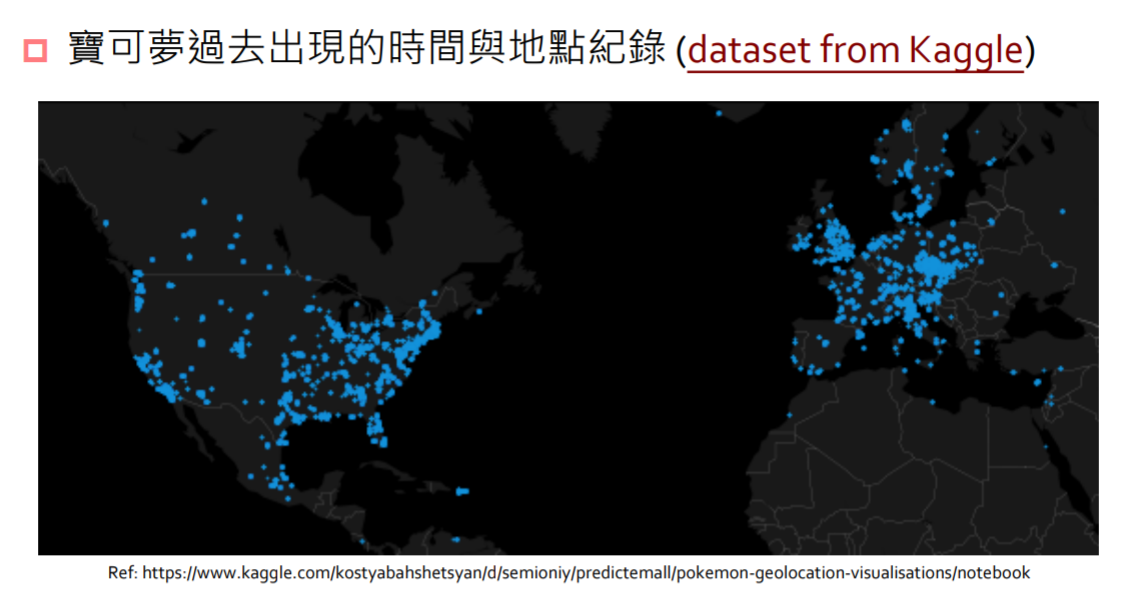

In [1]:
from IPython.display import Image

Image(filename='./image/pok.png', width=600)

In [3]:
# 讀進檔案，以逗號分隔的 csv 檔，不包含第一行的欄位定義
my_data = np.genfromtxt('pkgo_city66_class5_v1.csv', delimiter=',',skip_header=1)

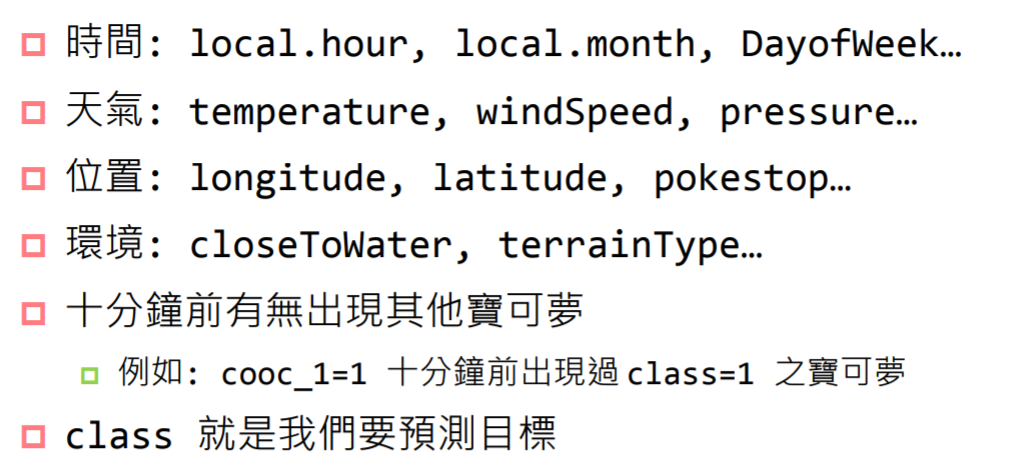

In [3]:
Image(filename='./image/pok3.png', width=600)

In [4]:
# Input 是有 200 個欄位 (index 從 0 - 199)
X_train = my_data[:,0:200]
X_train = X_train.astype('float32')

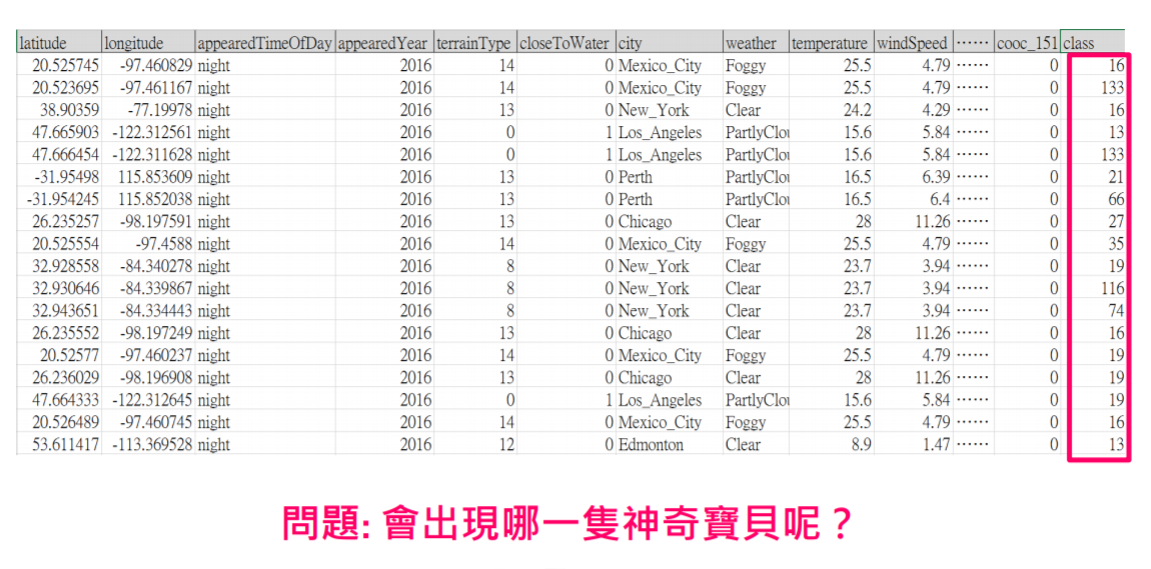

In [2]:
Image(filename='./image/pok2.png', width=600)

In [5]:
# Output 是第 201 個欄位 (index 為 200)
y_train = my_data[:,200]
y_train = y_train.astype('int')

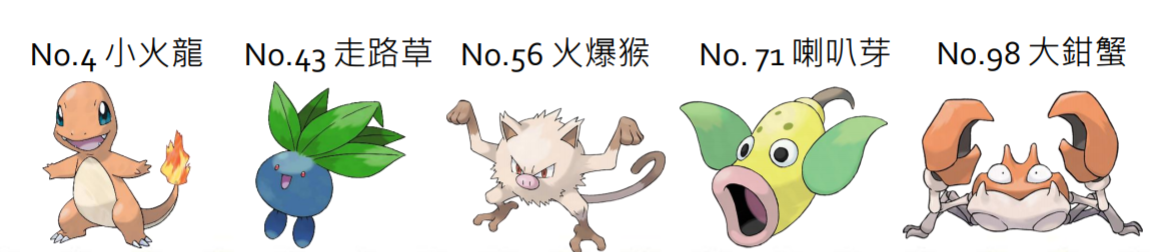

In [4]:
Image(filename='./image/pok4.png', width=600)

In [6]:
# 觀察一筆 X_train
print(X_train[1,:32])

[  7.32567608e-02  -7.03223109e-01   9.00000000e+00   8.00000000e+00
   2.00000000e+00   5.00000000e+01   4.50000000e+01   4.00000000e+00
   4.00000000e+00   5.00000000e+01   1.00000000e+00   8.00000000e+00
   8.00000000e+00   1.30000000e+01   0.00000000e+00   6.60000000e+01
   2.00000000e+00   5.00000000e+00   5.11728227e-01  -1.19994007e-01
   2.61039048e-01   4.33402471e-02   1.20537996e+00   1.83238339e+00
  -1.39905763e+00   1.12362671e+00   6.24226868e-01  -8.81169885e-02
   1.41916251e+00  -1.14249873e+00  -4.79164541e-01   0.00000000e+00]


In [7]:
# 觀察一筆 y_train
print(y_train[0])

1


In [8]:
# [重要] 將 Output 從特定類別轉換成 one-hot encoding 的形式
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train,5)

Using TensorFlow backend.


In [10]:
# 轉換成 one-hot encoding 後的 Y_train
print(Y_train[0,:])

[ 0.  1.  0.  0.  0.]


In [11]:
#Shuffle training data 
from sklearn.utils import shuffle
X_train,Y_train = shuffle(X_train,Y_train,random_state=100)

# 建立深度學習模型


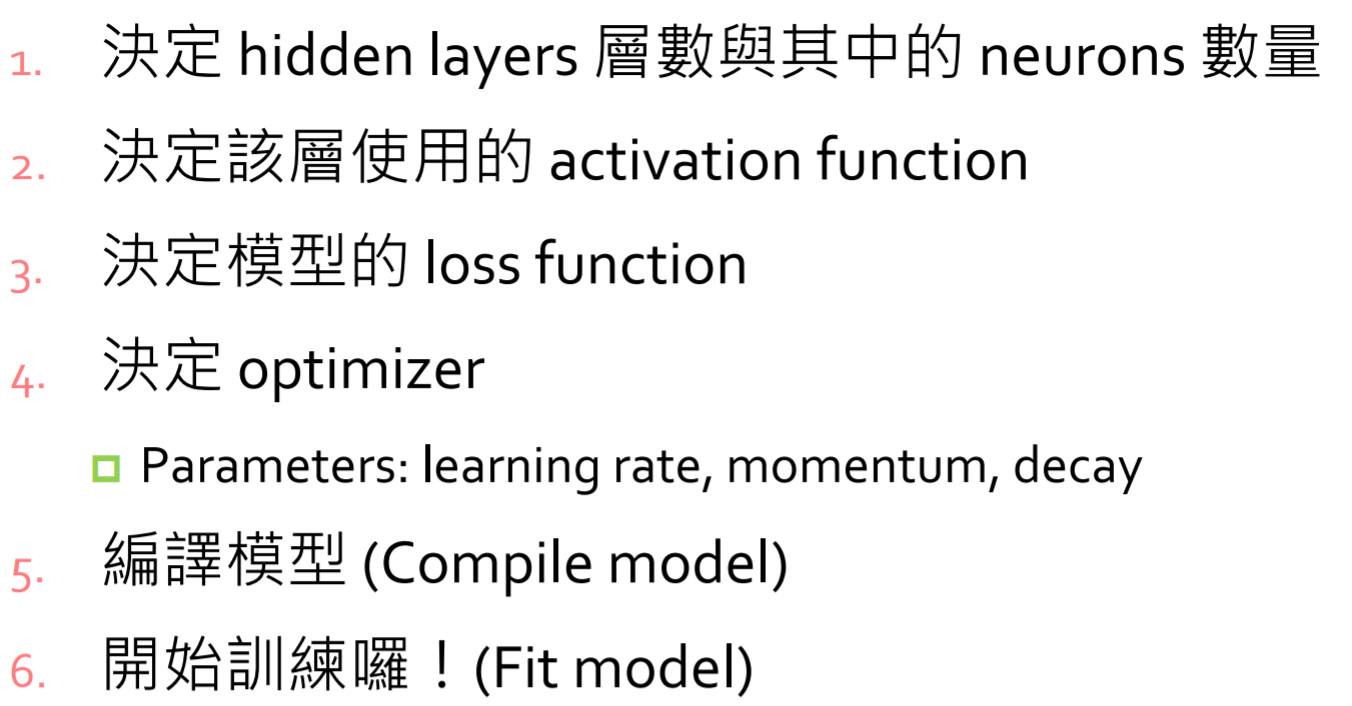

In [12]:
from IPython.display import Image

Image(filename='./image/step.png', width=600)

In [13]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

In [14]:
# 宣告這是一個 Sequential 次序性的深度學習模型
model = Sequential()

## 步驟一

### 決定 Hidden Layer 層數和其中 Neurous 數量

In [17]:
# 加入第一層 hidden layer (128 neurons)
# 因為第一層 hidden layer 需連接 input vector 故需要在此指定 input_dim
model.add(Dense(128, input_dim=200))

# Model 建構時，是以次序性的疊加 (add) 上去

## 步驟二

### 決定該層使用的 Activation Function

In [18]:
# 指定 activation function
model.add(Activation('sigmoid'))

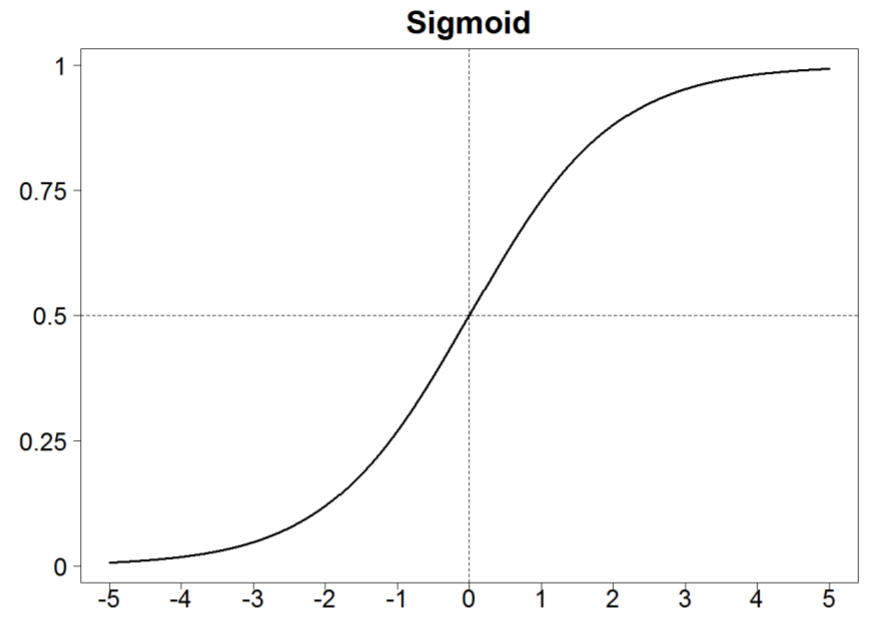

In [22]:
Image(filename='./image/sigmoid.png', width=600)

In [19]:
# 加入第二層 hidden layer (256 neurons)
model.add(Dense(256))
model.add(Activation('sigmoid'))

In [20]:
# 加入 output layer (5 neurons)
model.add(Dense(5))
model.add(Activation('softmax'))

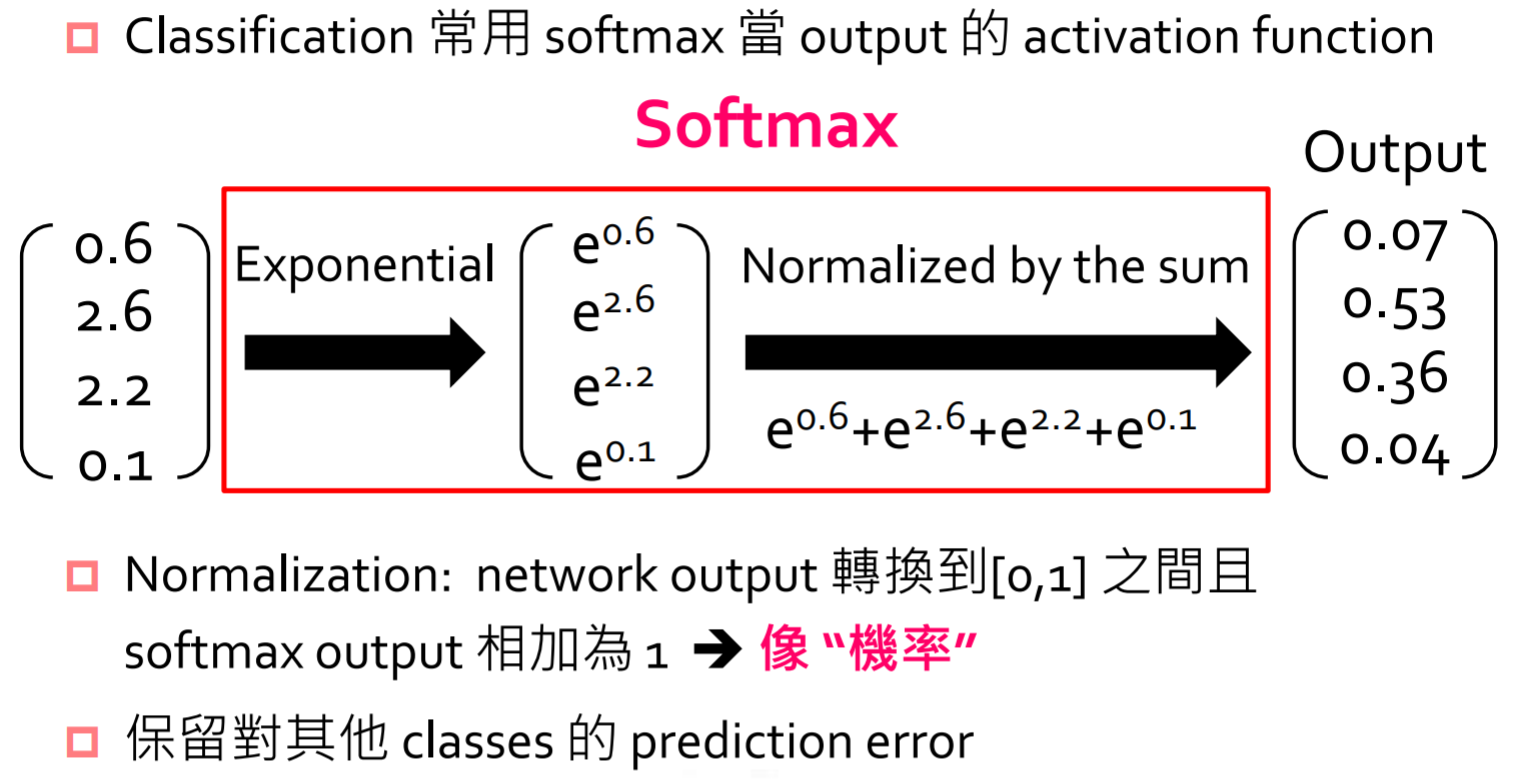

In [23]:
Image(filename='./image/softmax.png', width=600)

In [21]:
# 觀察 model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               25728     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 1285      
_________________________________________________________________
activation_3 (Activation)    (None, 5)                 0         
Total para

In [ ]:
# 另外一種寫法
# model.add(Dense(5,activation=‘softmax’,name='output'))
# 觀察 model summary
# model.summary()

## 步驟三

### 選擇 Loss Function

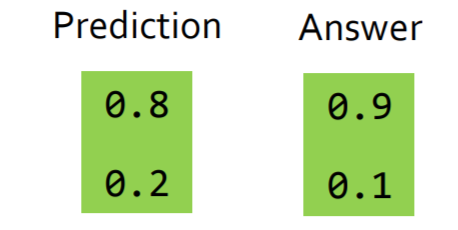

In [26]:
Image(filename='./image/pred.png', width=200)

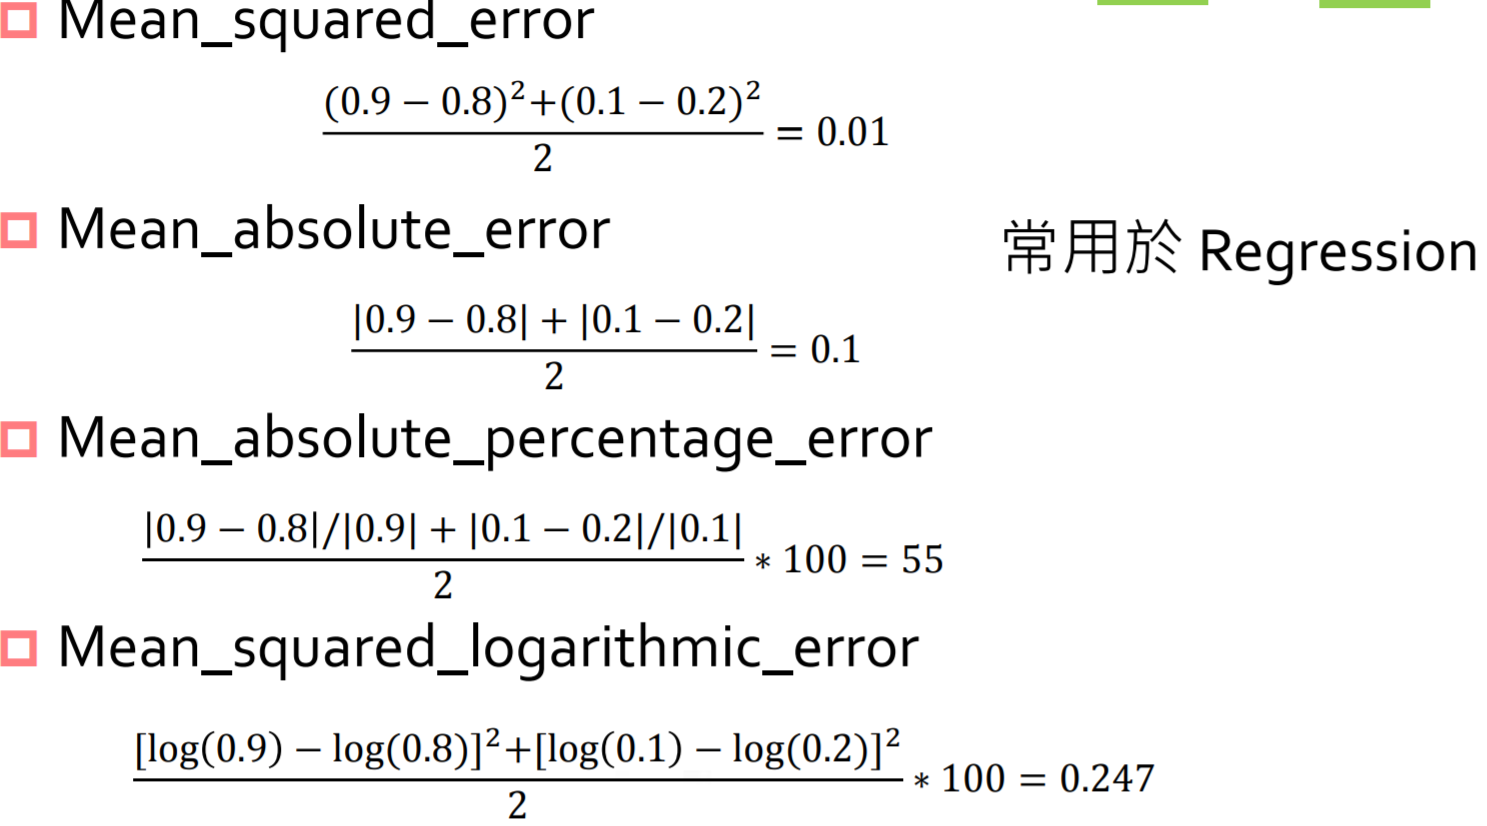

In [28]:
Image(filename='./image/loss.png', width=500)

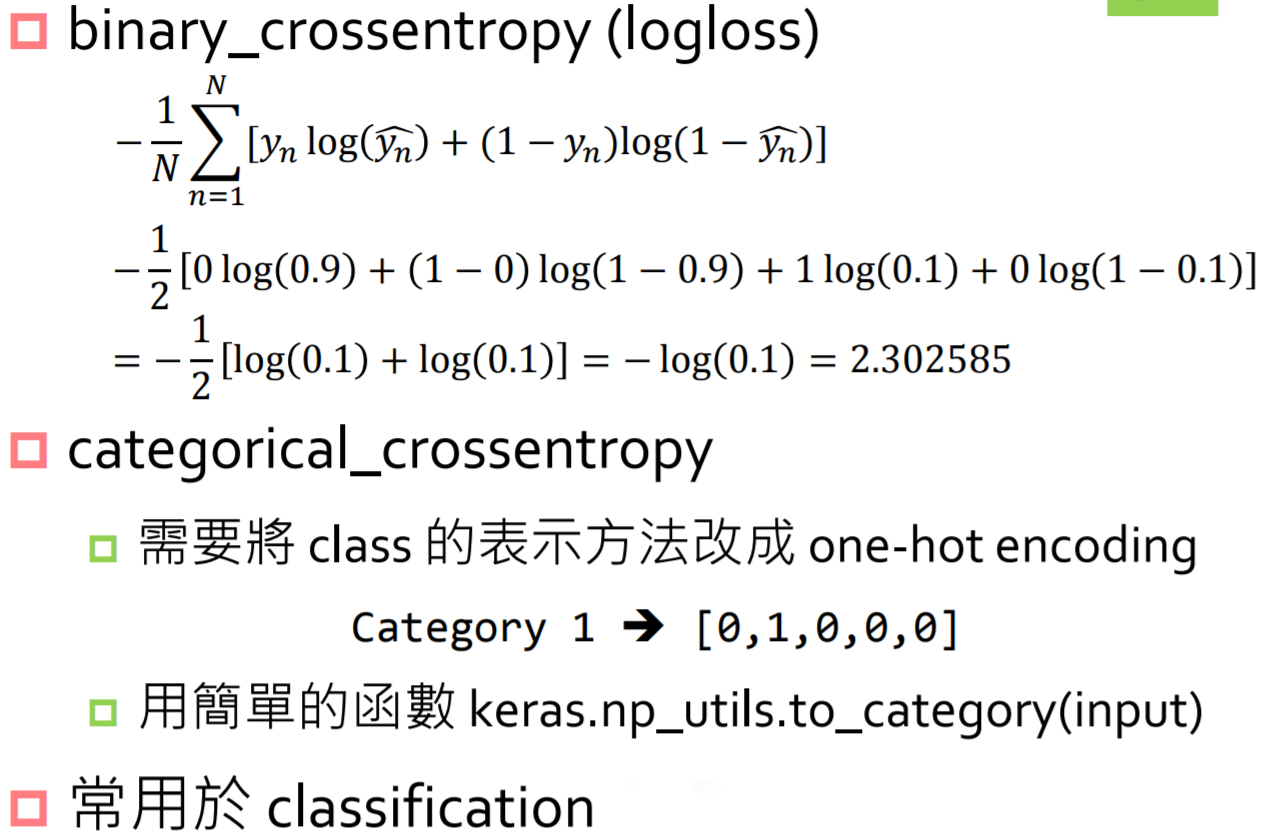

In [29]:
Image(filename='./image/loss2.png', width=500)

## 步驟四

### 選擇 Optimizer

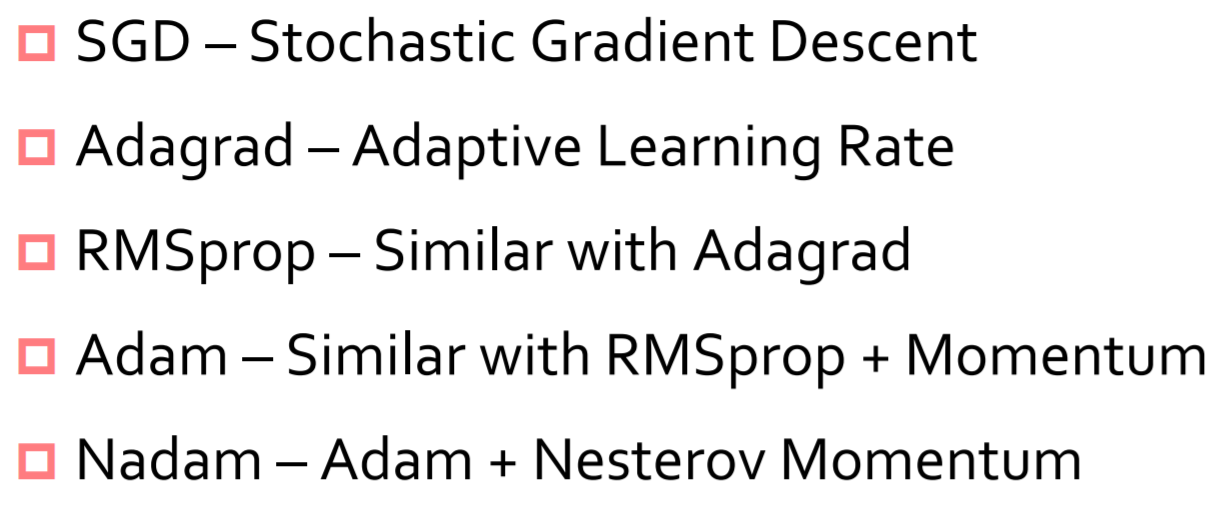

In [30]:
Image(filename='./image/opt.png', width=500)

In [31]:
# 指定 optimizier
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
sgd = SGD(lr=0.01,momentum=0.0,decay=0.0,nesterov=False)

## 步驟五

### 編譯模型

In [63]:
# 指定 loss function 和 optimizier
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

#### Cross Validation

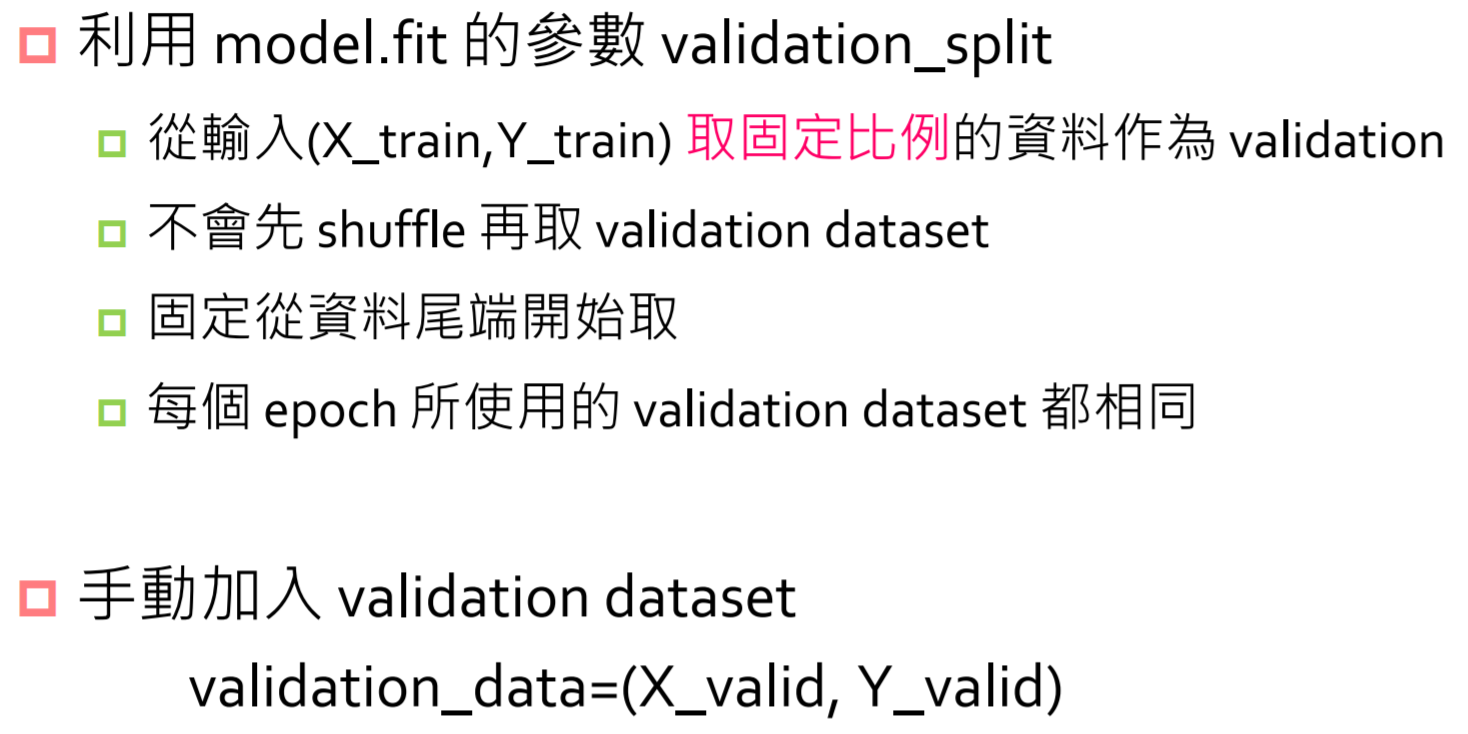

In [33]:
Image(filename='./image/cv.png', width=500)

## 步驟六

### Fit Model 

In [64]:
# 指定 batch_size, nb_epoch, validation 後，開始訓練模型!!!
history = model.fit( X_train,
                    Y_train,
                    batch_size=16,
                    verbose=2,
                    epochs=30,
                    shuffle=True,
                    validation_split=0.1)

Train on 1652 samples, validate on 184 samples
Epoch 1/30
0s - loss: 0.9294 - acc: 0.6701 - val_loss: 0.9851 - val_acc: 0.6250
Epoch 2/30
0s - loss: 0.9180 - acc: 0.6768 - val_loss: 0.9371 - val_acc: 0.6630
Epoch 3/30
0s - loss: 0.9215 - acc: 0.6731 - val_loss: 0.9436 - val_acc: 0.6685
Epoch 4/30
0s - loss: 0.9217 - acc: 0.6713 - val_loss: 1.1062 - val_acc: 0.5707
Epoch 5/30
0s - loss: 0.9201 - acc: 0.6768 - val_loss: 1.1299 - val_acc: 0.5761
Epoch 6/30
0s - loss: 0.8991 - acc: 0.6828 - val_loss: 0.9871 - val_acc: 0.6359
Epoch 7/30
0s - loss: 0.9222 - acc: 0.6810 - val_loss: 1.0376 - val_acc: 0.6250
Epoch 8/30
0s - loss: 0.9168 - acc: 0.6707 - val_loss: 1.1401 - val_acc: 0.5652
Epoch 9/30
0s - loss: 0.9008 - acc: 0.6768 - val_loss: 1.0939 - val_acc: 0.5978
Epoch 10/30
0s - loss: 0.9075 - acc: 0.6774 - val_loss: 0.9560 - val_acc: 0.6413
Epoch 11/30
0s - loss: 0.9099 - acc: 0.6786 - val_loss: 0.9368 - val_acc: 0.6576
Epoch 12/30
0s - loss: 0.9106 - acc: 0.6743 - val_loss: 0.9864 - val_ac

* batch_size: min-batch 的大小

* nb_epoch: epoch 數量

    1 epoch 表示看過全部的 training dataset 一次

* shuffle: 每次 epoch 結束後是否要打亂 training dataset

* verbose: 是否要顯示目前的訓練進度，0 為不顯示

In [75]:
loss = history.history.get('loss')
acc = history.history.get('acc')
val_acc = history.history.get('val_acc')

In [97]:
import matplotlib.pyplot as plt
plt.figure(0)
plt.subplot(121)
plt.plot(range(len(loss)), loss,label='loss')
plt.title('Loss')
plt.legend(loc='upper left')

plt.subplot(122)
plt.plot(range(len(acc)), acc,label='accuracy')
plt.plot(range(len(val_acc)),val_acc,label='val_acc')
plt.legend(loc='upper left')

plt.title('Accuracy')

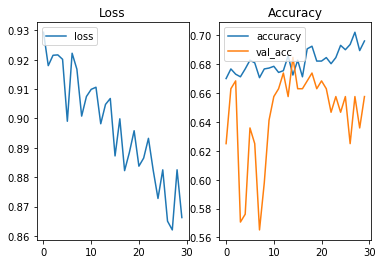

In [98]:
plt.show()

In [99]:
plt.clf()
plt.close()

# 如何改善？

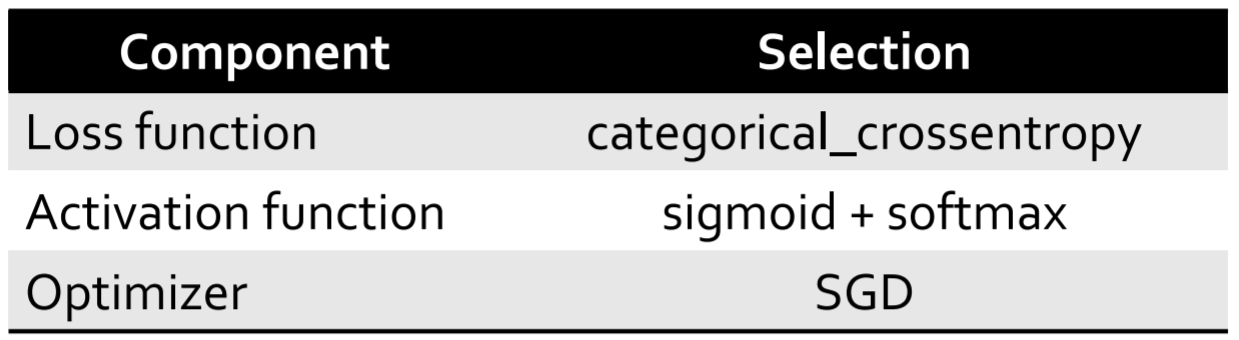

In [100]:
Image(filename='./image/comp.png', width=500)

# Tips for Training DL Models

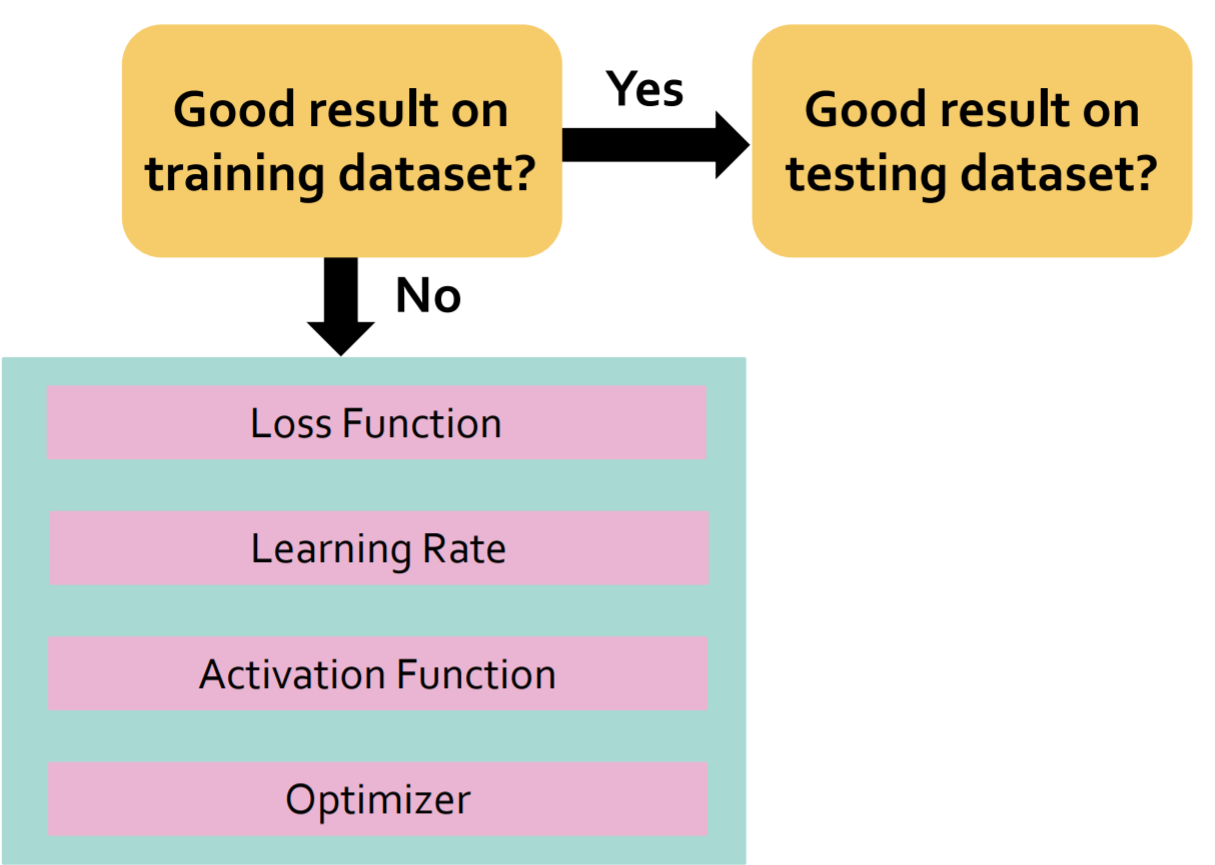

In [101]:
Image(filename='./image/resu.png', width=500)

### Lose Function Compare

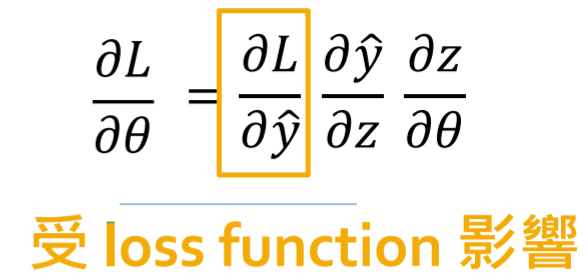

In [103]:
Image(filename='./image/loss3.png', width=300)

In [115]:
# categorical_crossentropy

model_ce = Sequential()
model_ce.add(Dense(128, input_dim=200))
model_ce.add(Activation('sigmoid'))
model_ce.add(Dense(256))
model_ce.add(Activation('sigmoid'))
model_ce.add(Dense(5))
model_ce.add(Activation('softmax'))

# mean_squared_error

model_mse = Sequential()
model_mse.add(Dense(128, input_dim=200))
model_mse.add(Activation('sigmoid'))
model_mse.add(Dense(256))
model_mse.add(Activation('sigmoid'))
model_mse.add(Dense(5))
model_mse.add(Activation('softmax'))

In [117]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
sgd = SGD(lr=0.01,momentum=0.0,decay=0.0,nesterov=False)

In [119]:
model_ce.compile(loss='categorical_crossentropy',
                 optimizer='SGD',
                 metrics=['accuracy'])

model_mse.compile(loss= 'mean_squared_error',
                  optimizer='SGD',
                  metrics=['accuracy'])

In [120]:
batch_size = 16
epochs = 30

In [121]:
# 指定 batch_size, nb_epoch, validation 後，開始訓練
history_ce = model_ce.fit(X_train, Y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=0,
                          shuffle=True,
                          validation_split=0.1)

history_mse = model_mse.fit(X_train, Y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=0,
                            shuffle=True,
                            validation_split=0.1)

In [122]:
loss_ce = history_ce.history.get('loss')
acc_ce = history_ce.history.get('acc')
# val_acc = history.history.get('val_acc')

loss_mse= history_mse.history.get('loss')
acc_mse = history_mse.history.get('acc')

In [127]:
import matplotlib.pyplot as plt
plt.figure(0)
plt.subplot(121)
plt.plot(range(len(loss_ce)), loss_ce,label='CE')
plt.plot(range(len(loss_mse)), loss_mse,label='MSE')
plt.title('Loss')
plt.legend(loc='lower left')

plt.subplot(122)
plt.plot(range(len(acc_ce)), acc_ce,label='CE')
plt.plot(range(len(acc_mse)), acc_mse,label='MSE')
plt.title('Accuracy')

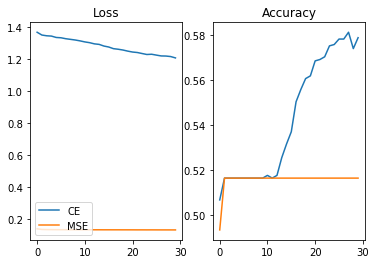

In [128]:
plt.show()

In [129]:
plt.clf()
plt.close()

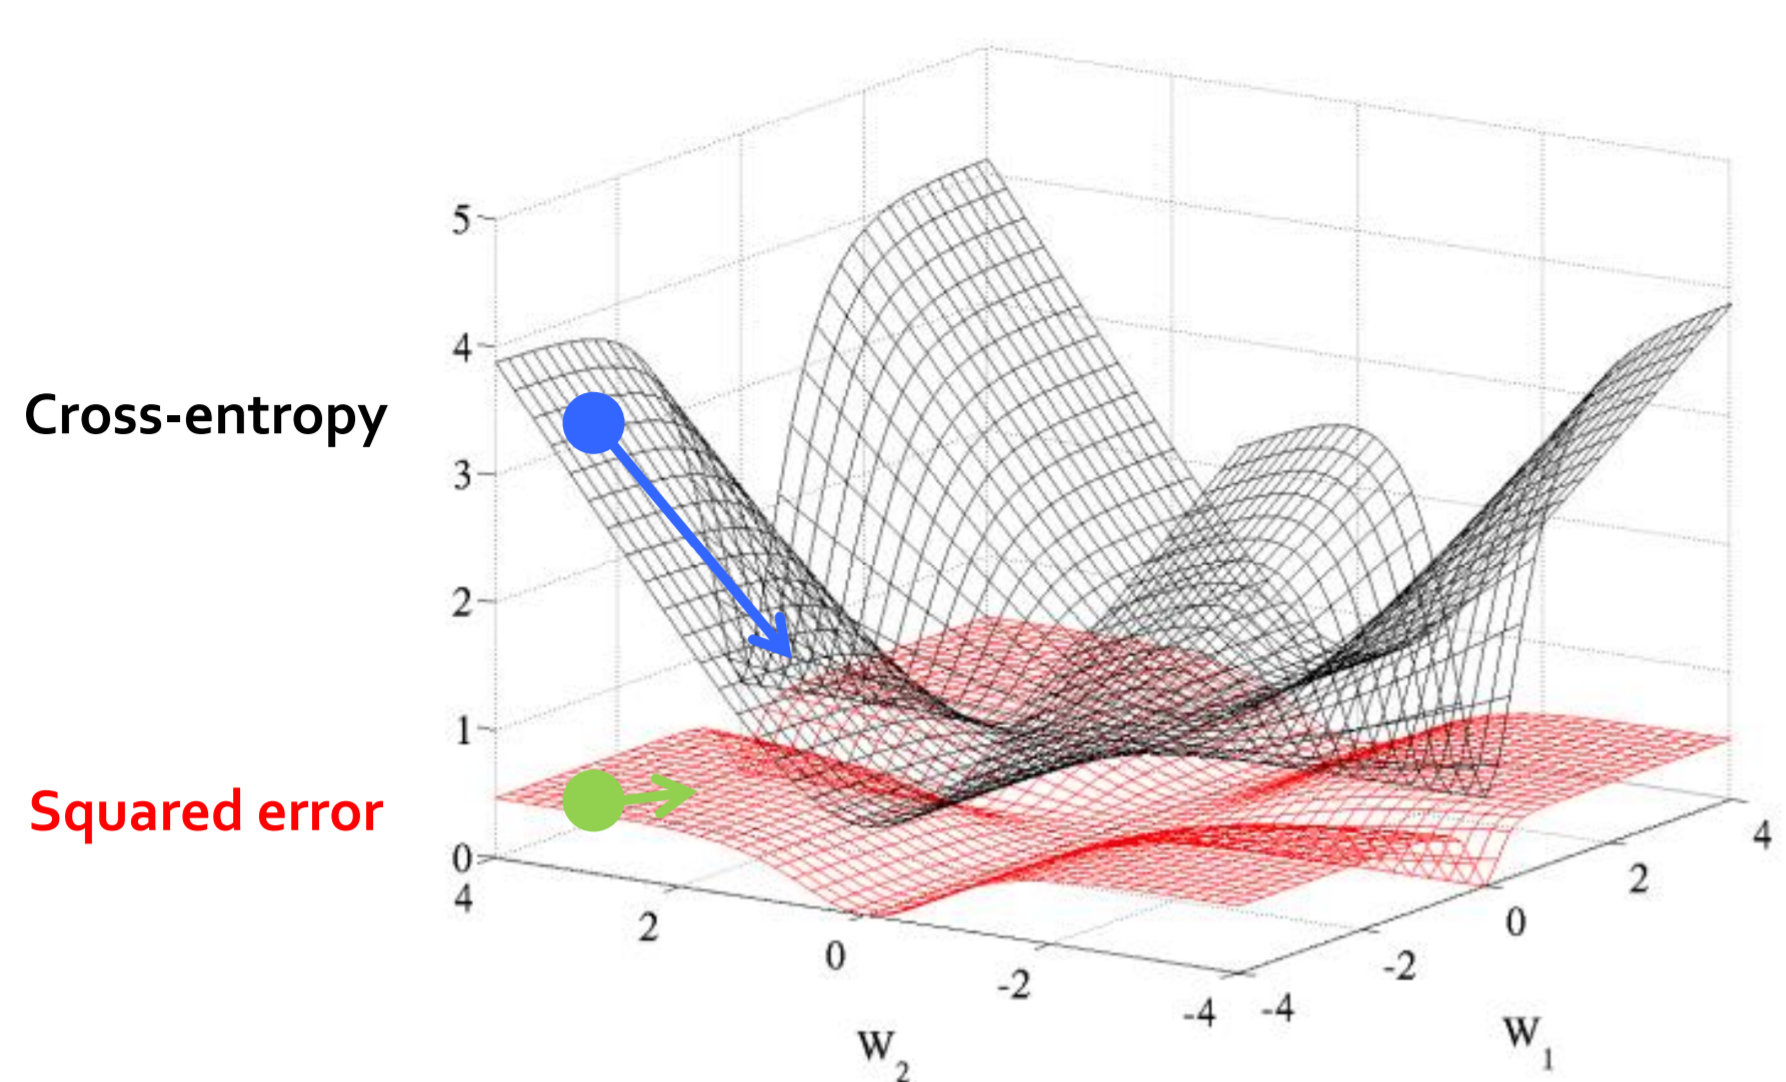

In [131]:
Image(filename='./image/ce_mse.png', width=500)

The error surface of logarithmic functions is steeper thanthat of quadratic functions.

http://www.complex-systems.com/pdf/02-6-1.pdf
http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf

#### How to Select Loss function

* Classification 常用 cross-entropy
    * 搭配 softmax 當作 output layer 的 activation function

* Regression 常用 mean absolute/squared error
    * 對特定問題定義 loss function

Unbalanced dataset, class 0 : class 1 = 99 : 1

Self-defined loss function

### Learning Rate compare

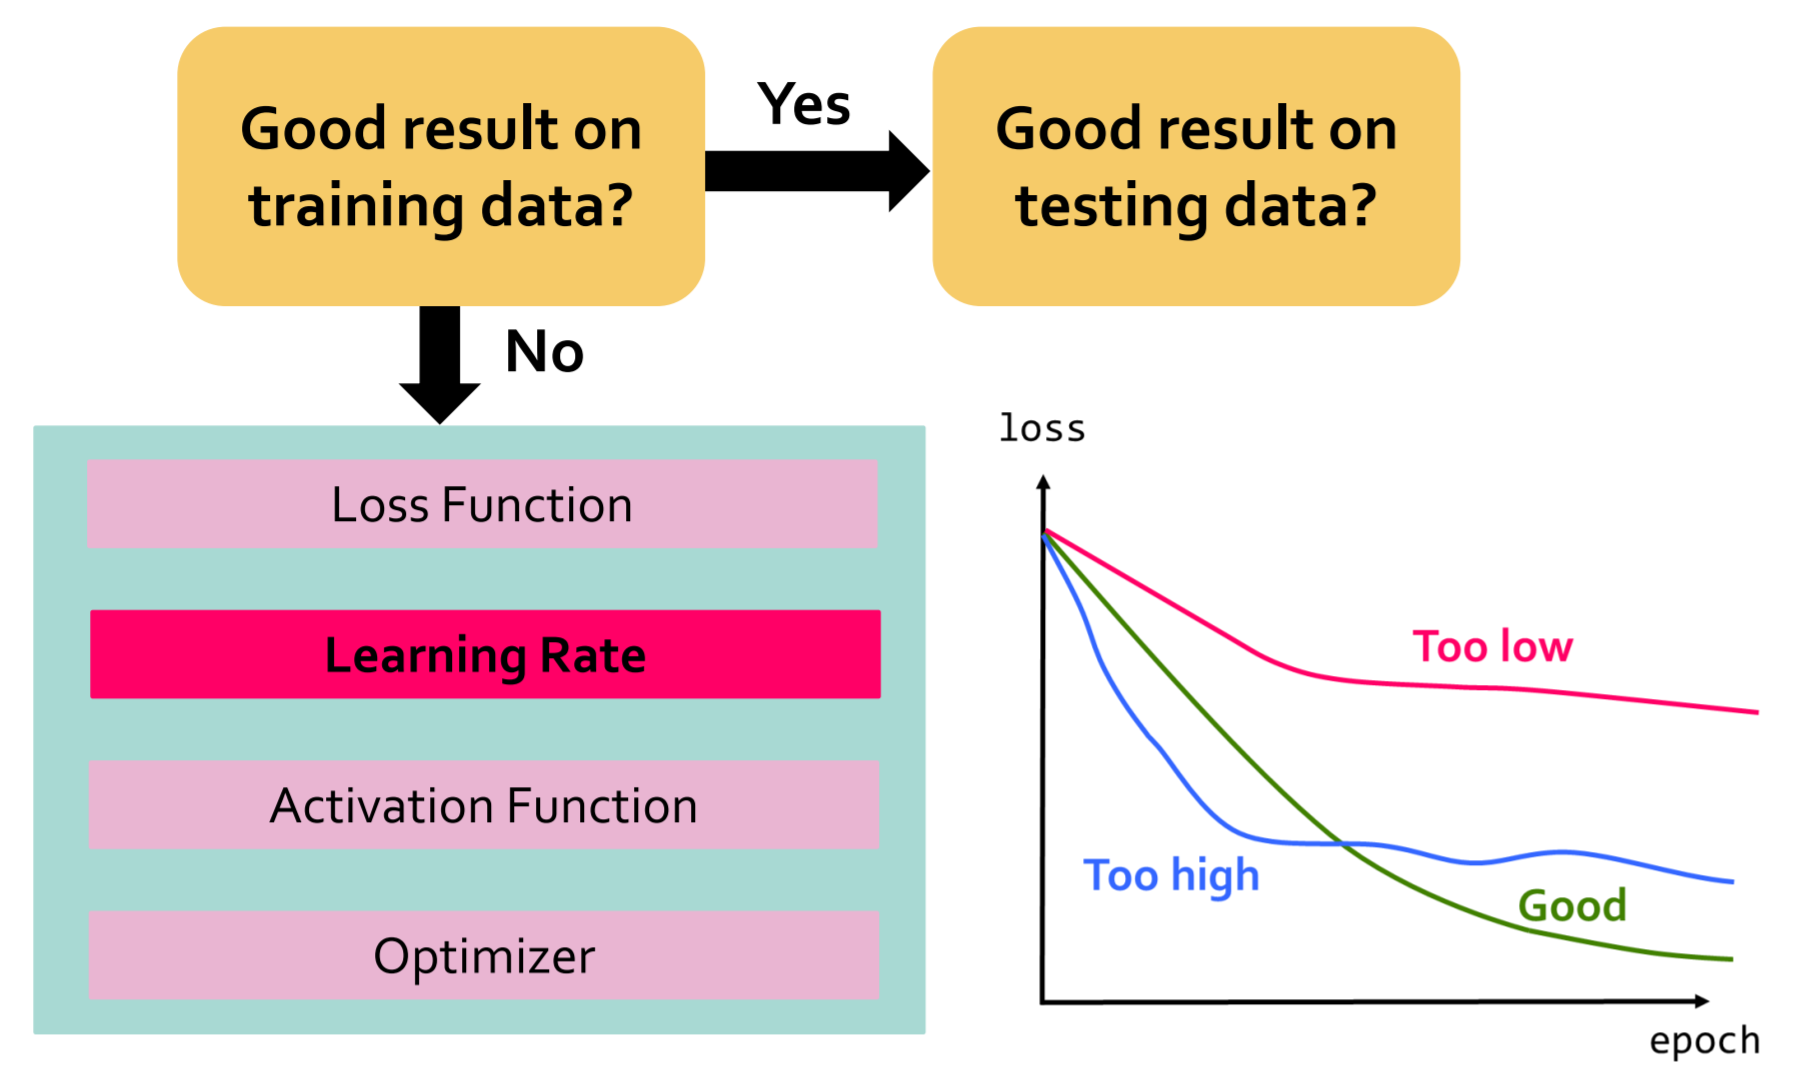

In [132]:
Image(filename='./image/lr.png', width=500)

from keras.optimizers import SGD, Adam, RMSprop, Adagrad

sgd = SGD(lr=0.01,momentum=0.0,decay=0.0,nesterov=False)

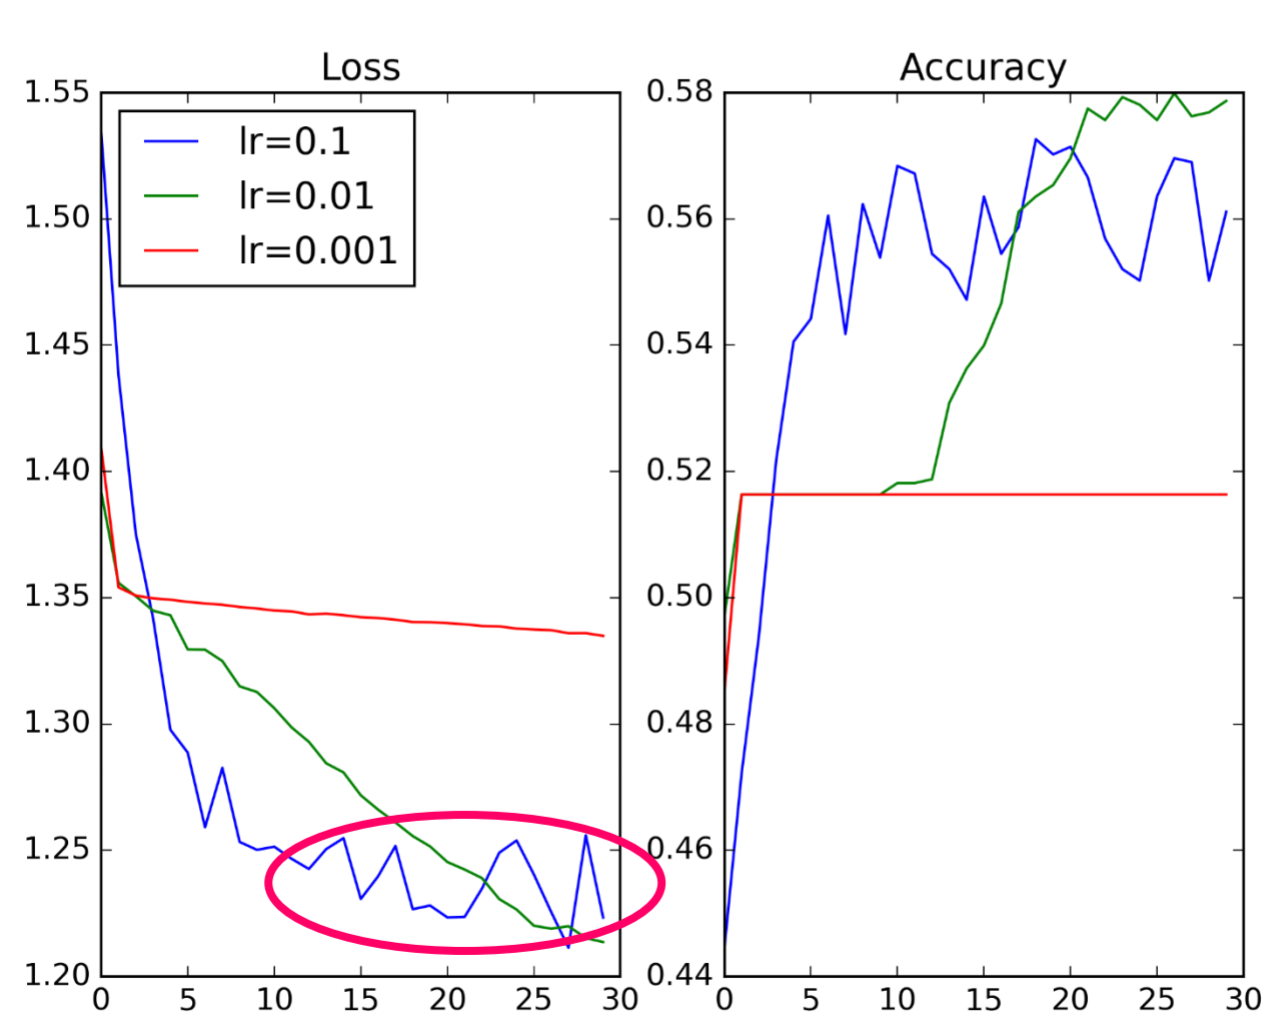

In [133]:
Image(filename='./image/lr_c.png', width=500)

### Activation Function

In [2]:
Image(filename='./image/acti.png', width=500)

NameError: name 'Image' is not defined

In [3]:
batch_size = 16
epochs = 30

In [1]:
# ReLU

model_sp = Sequential()
model_sp.add(Dense(128, input_dim=200))
model_sp.add(Activation('relu'))
model_sp.add(Dense(256))
model_sp.add(Activation('relu'))
model_sp.add(Dense(5))
model_sp.add(Activation('softmax'))

# Sigmoid
model_bm = Sequential()
model_bm.add(Dense(128, input_dim=200))
model_bm.add(Activation('sigmoid'))
model_bm.add(Dense(256))
model_bm.add(Activation('sigmoid'))
model_bm.add(Dense(5))
model_bm.add(Activation('softmax'))

# Leaky ReLU in Keras

# From keras.layer.advanced_activation import LeakyReLU
# lrelu = LeakyReLU(alpha = 0.02)
# model.add(Dense(128, input_dim = 200))
# 指定 activation function
# model.add(lrelu)

NameError: name 'Sequential' is not defined

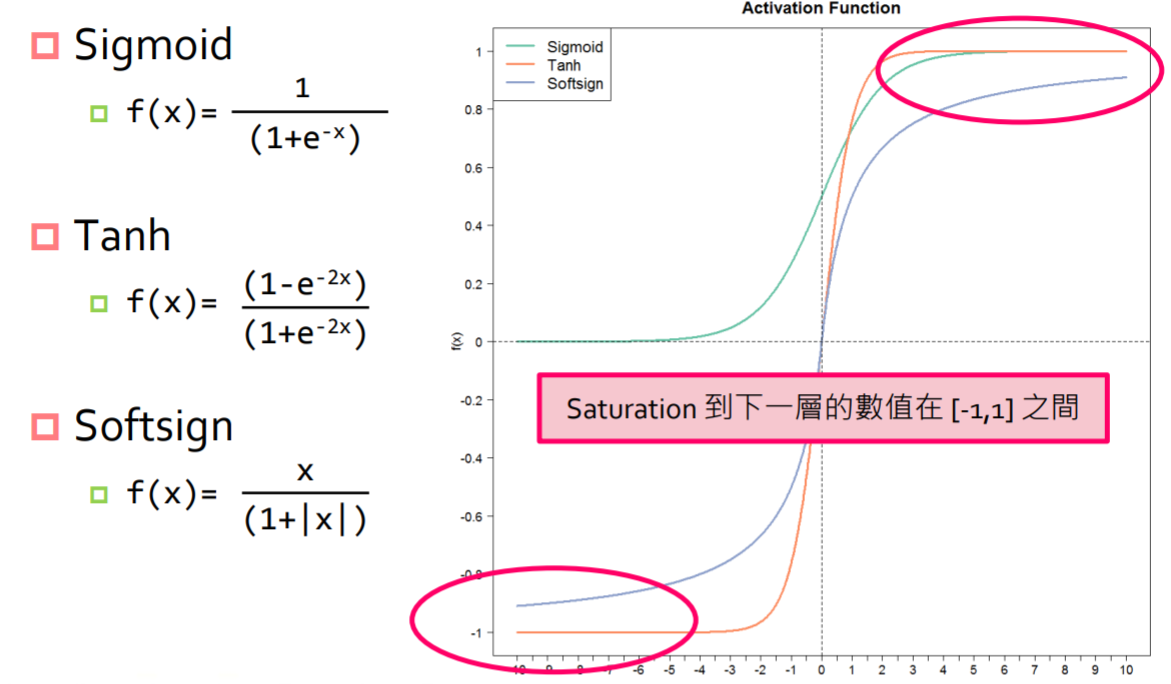

In [145]:
Image(filename='./image/acti1.png', width=500)

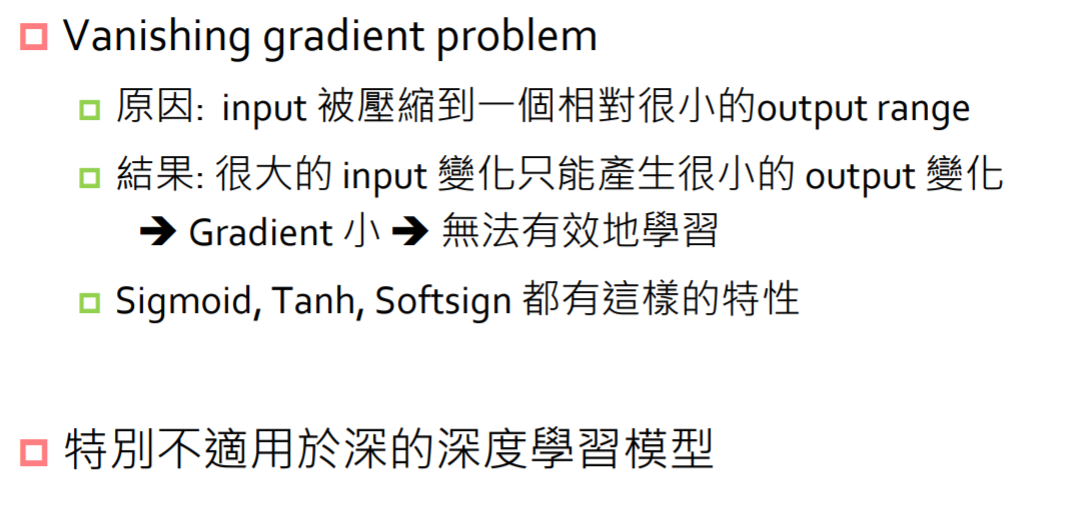

In [146]:
Image(filename='./image/acti2.png', width=500)

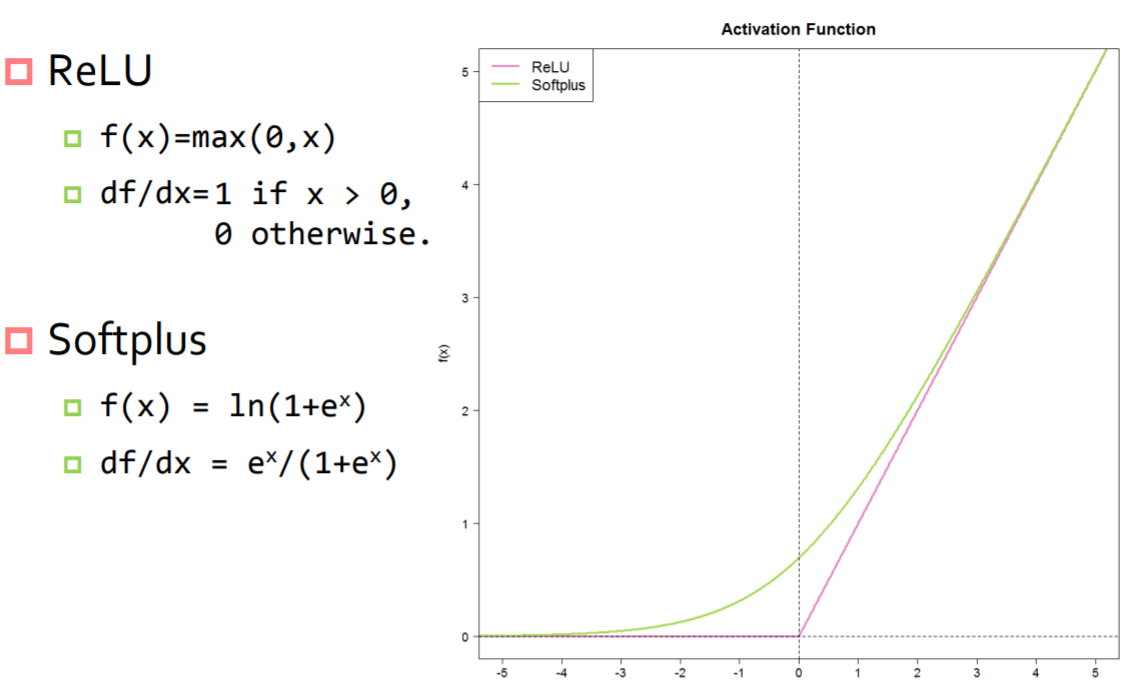

In [147]:
Image(filename='./image/acti3.png', width=500)

In [138]:
sgd = SGD(lr=0.01,momentum=0.0,decay=0.0,nesterov=False)


In [139]:
model_sp.compile(loss= 'categorical_crossentropy',
                 optimizer=sgd,
                 metrics=['accuracy'])

model_bm.compile(loss='categorical_crossentropy',
                 optimizer=sgd,
                 metrics=['accuracy'])

In [140]:
history_sp = model_sp.fit(X_train, Y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=0,
                          shuffle=True,
                          validation_split=0.1)

history_bm = model_bm.fit(X_train, Y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=0,
                          shuffle=True,
                          validation_split=0.1)

In [141]:
loss_sp = history_sp.history.get('loss')
acc_sp = history_sp.history.get('acc')

loss_bm	= history_bm.history.get('loss')
acc_bm 	= history_bm.history.get('acc')

In [142]:
plt.figure(0)
plt.subplot(121)
plt.plot(range(len(loss_sp)),loss_sp,label='ReLU')
plt.plot(range(len(loss_bm)),loss_bm,label='Sigmoid')
plt.title('Loss')
plt.legend(loc='upper left')
plt.subplot(122)
plt.plot(range(len(acc_sp)),acc_sp,label='ReLU')
plt.plot(range(len(acc_bm)),acc_bm,label='Sigmoid')
plt.title('Accuracy')

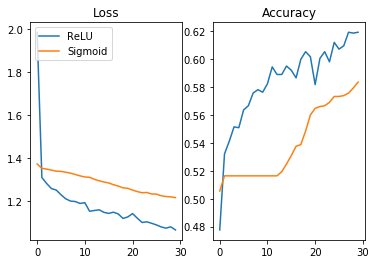

In [143]:
plt.show()

In [144]:
plt.close()
plt.clf()

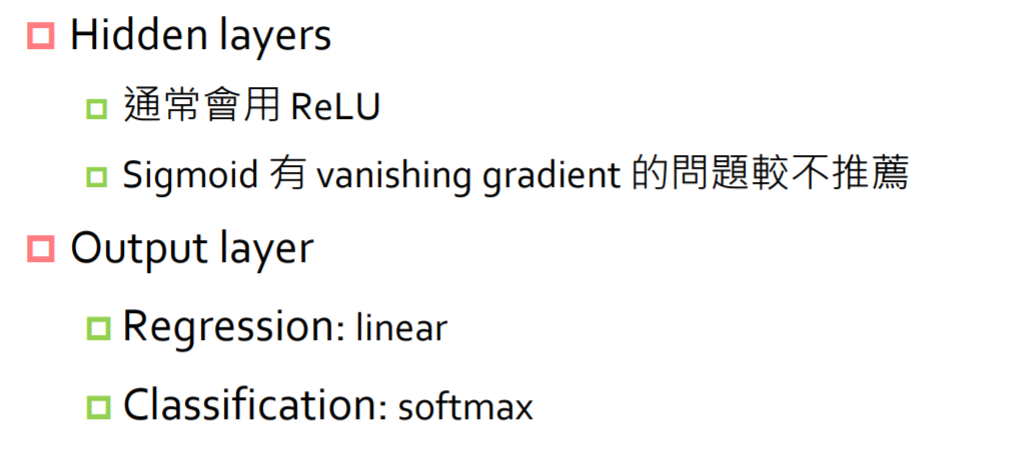

In [148]:
Image(filename='./image/acti4.png', width=500)

### Optimizer

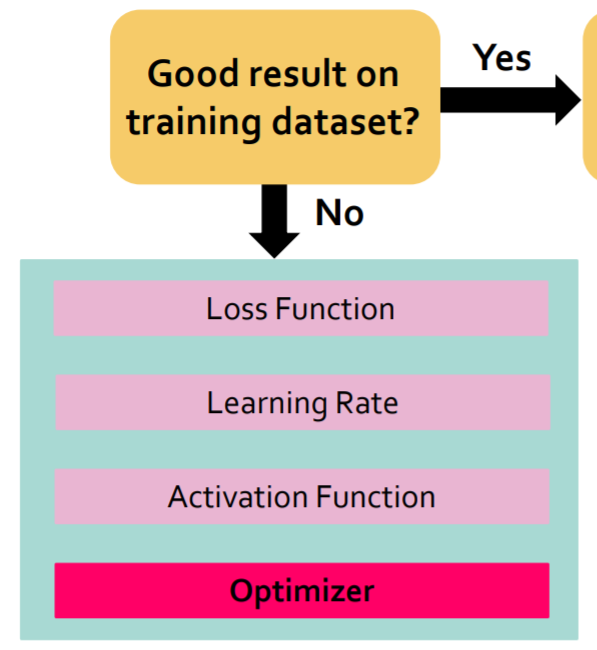

In [150]:
Image(filename='./image/opt1.png', width=300)

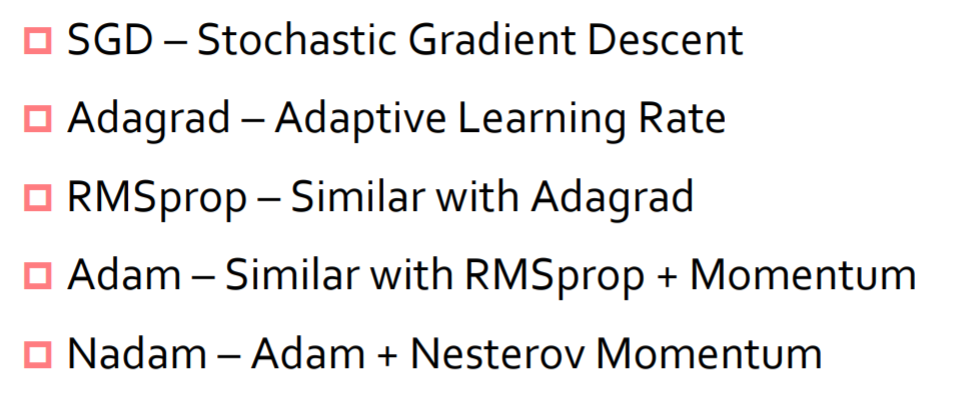

In [160]:
Image(filename='./image/opt2.png', width=300)

In [151]:
# adam
model_adam = Sequential()
model_adam.add(Dense(128, input_dim=200))
model_adam.add(Activation('relu'))
model_adam.add(Dense(256))
model_adam.add(Activation('relu'))
model_adam.add(Dense(5))
model_adam.add(Activation('softmax'))

# sgd
model_sgd = Sequential()
model_sgd.add(Dense(128, input_dim=200))
model_sgd.add(Activation('relu'))
model_sgd.add(Dense(256))
model_sgd.add(Activation('relu'))
model_sgd.add(Dense(5))
model_sgd.add(Activation('softmax'))

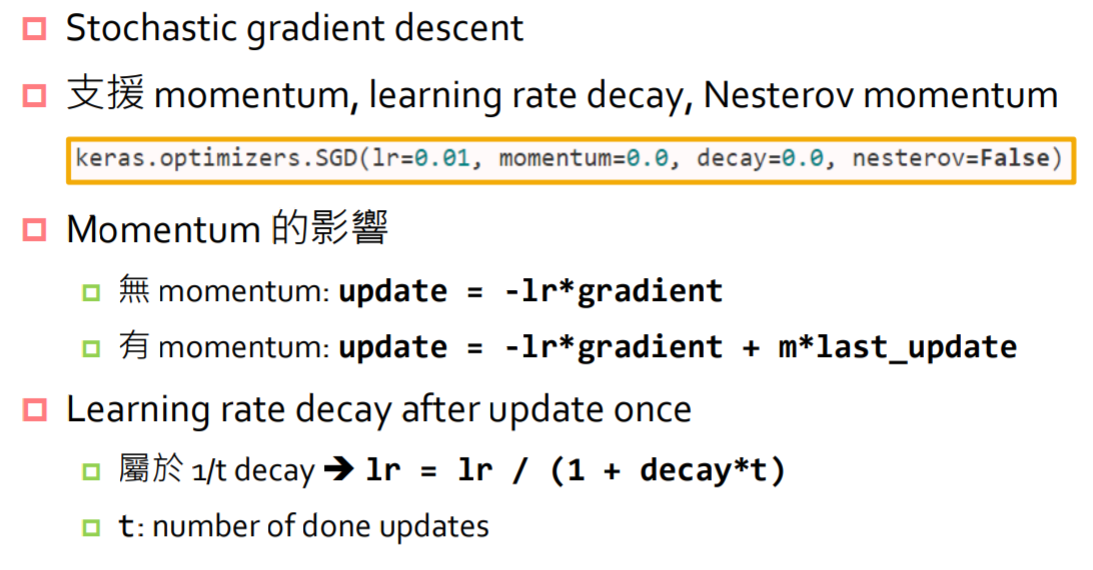

In [162]:
Image(filename='./image/opt3.png', width=400)

In [153]:
from keras.optimizers import  Adam

model_adam.compile(loss='categorical_crossentropy',
                   optimizer='Adam',
                   metrics=['accuracy'])

model_sgd.compile(loss='categorical_crossentropy',
                  optimizer='SGD',
                  metrics=['accuracy'])

In [154]:
history_adam = model_adam.fit(X_train, Y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=0,
                              shuffle=True,
                              validation_split=0.1)

history_sgd = model_sgd.fit(X_train, Y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=0,
                            shuffle=True,
                            validation_split=0.1)

In [155]:
loss_adam= history_adam.history.get('loss')
acc_adam = history_adam.history.get('acc')

loss_sgd= history_sgd.history.get('loss')
acc_sgd = history_sgd.history.get('acc')

In [156]:
plt.figure(0)
plt.subplot(121)
plt.plot(range(len(loss_adam)), loss_adam,label='Adam')
plt.plot(range(len(loss_sgd)), loss_sgd,label='SGD')
plt.title('Loss')
plt.legend(loc='upper left')
plt.subplot(122)
plt.plot(range(len(acc_adam)), acc_adam,label='Adam')
plt.plot(range(len(acc_sgd)), acc_sgd,label='SGD')
plt.title('Accuracy')

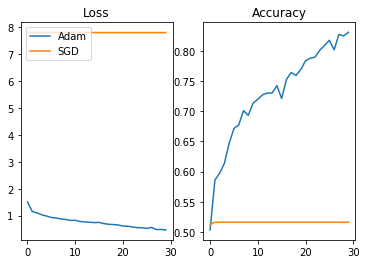

In [157]:
plt.show()

In [159]:
plt.close()
plt.clf()

http://ycszen.github.io/2016/08/24/SGD%EF%BC%8CAdagrad%EF%BC%8CAdadelta%EF%BC%8CAdam%E7%AD%89%E4%BC%98%E5%8C%96%E6%96%B9%E6%B3%95%E6%80%BB%E7%BB%93%E5%92%8C%E6%AF%94%E8%BE%83/

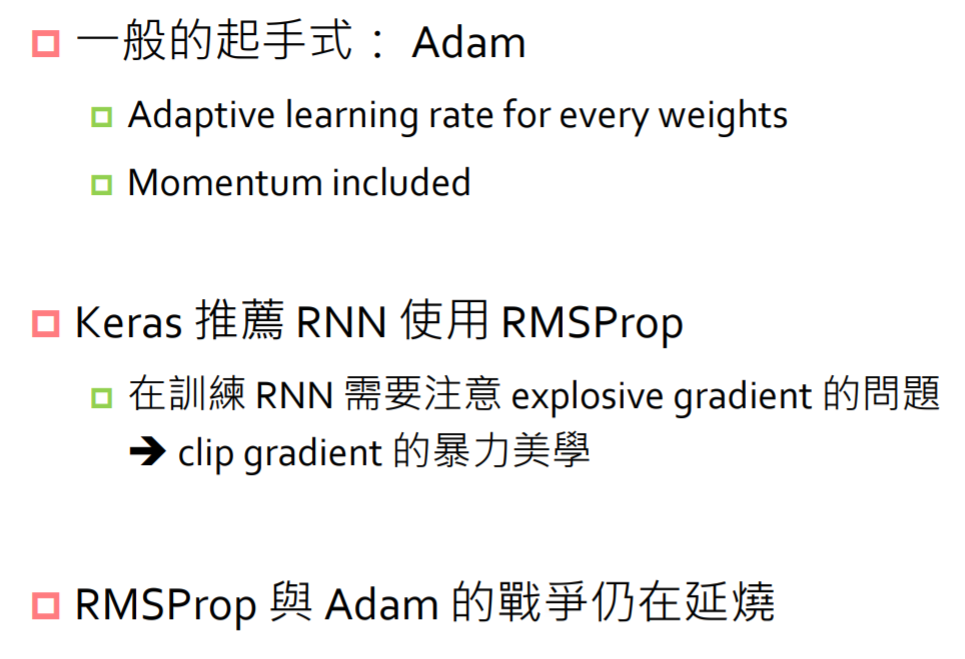

In [163]:
Image(filename='./image/opt4.png', width=400)

## Current Best Model Configuration


In [164]:
model_best = Sequential()
model_best.add(Dense(128, input_dim=200))
model_best.add(Activation('softplus'))
model_best.add(Dense(256))
model_best.add(Activation('softplus'))
model_best.add(Dense(5))
model_best.add(Activation('softmax'))

In [165]:
model_best.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])

In [166]:
history_best = model_adam.fit(X_train, Y_train,
                              batch_size=batch_size,
                              epochs=50,
                              verbose=0,
                              shuffle=True,
                              validation_split=0.1)

In [167]:
loss_best= history_best.history.get('loss')
acc_best = history_best.history.get('acc')

In [173]:
plt.figure(0)
plt.subplot(121)
plt.plot(range(len(loss_adam)), loss_adam,label='Adam')
plt.plot(range(len(loss_best)), loss_best,label='best')
plt.title('Loss')
plt.legend(loc='upper left')
plt.subplot(122)
plt.plot(range(len(acc_adam)), acc_adam,label='Adam')
plt.plot(range(len(acc_best)), acc_best,label='best')
plt.title('Accuracy')

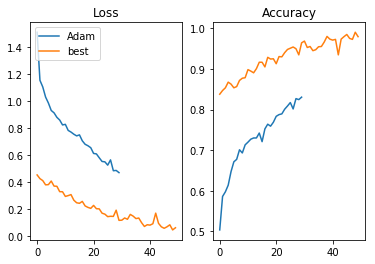

In [174]:
plt.show()

In [175]:
plt.close()
plt.clf()

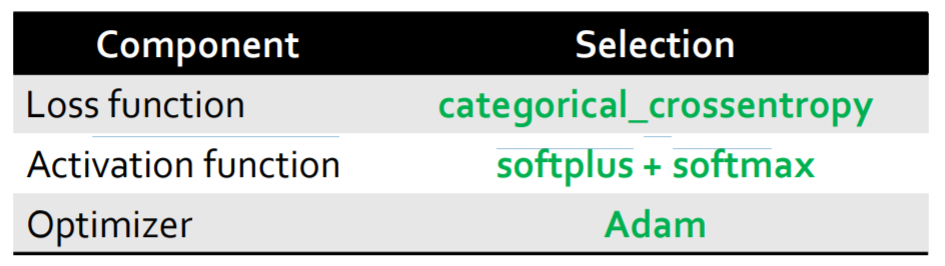

In [176]:
Image(filename='./image/best.png', width=400)

In [178]:
loss_best= history_best.history.get('loss')
acc_best = history_best.history.get('acc')

val_loss_best= history_best.history.get('val_loss')
val_acc_best = history_best.history.get('val_acc')

In [194]:
plt.figure(0)
plt.subplot(121)
plt.plot(range(len(loss_best)), loss_best,label='training')
plt.plot(range(len(val_loss_best)), val_loss_best,label='validation')
plt.title('Loss')
plt.legend(loc='upper left')
plt.subplot(122)
plt.plot(range(len(acc_best)), acc_best,label='train_acc')
plt.plot(range(len(val_acc_best)), val_acc_best,label='val_acc')
plt.title('Accuracy')

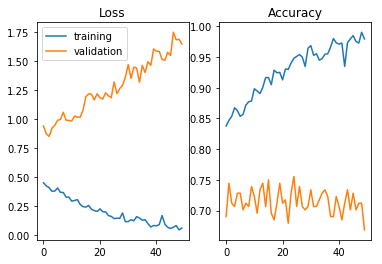

In [195]:
plt.show()

In [196]:
plt.close()
plt.clf()

## Overfitting

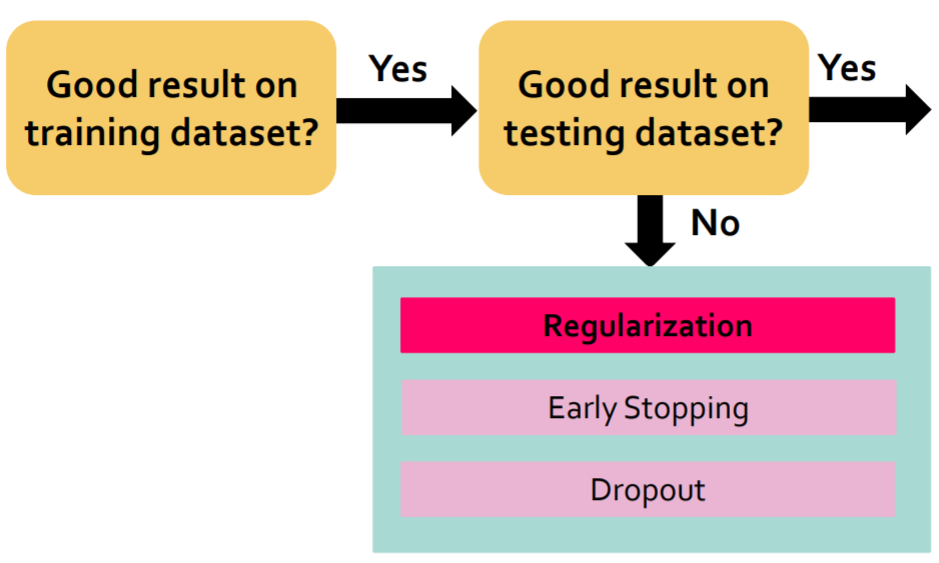

In [197]:
Image(filename='./image/reg.png', width=400)

### Regularization

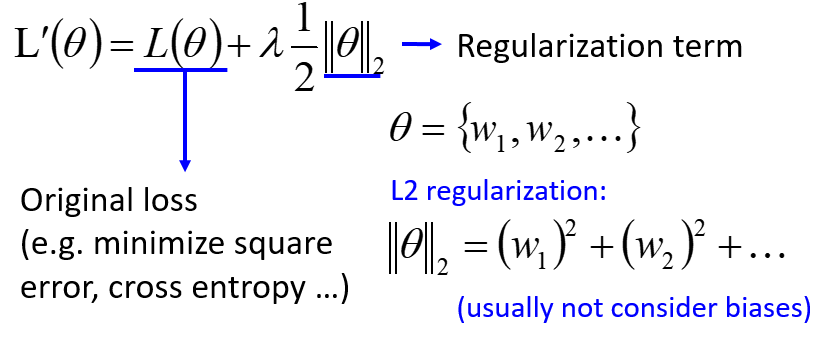

In [198]:
Image(filename='./image/reg1.png', width=400)

* L1 norm : Sum of absolute values

* L2 norm : Root mean square of absolute values

In [207]:
from keras.regularizers import l1,l2

model_l2 = Sequential()

model_l2.add(Dense(128,input_dim=200,kernel_regularizer=l2(0.01)))
model_l2.add(Activation('softplus'))

model_l2.add(Dense(256, kernel_regularizer=l2(0.01)))
model_l2.add(Activation('softplus'))

model_l2.add(Dense(5, kernel_regularizer=l2(0.01)))
model_l2.add(Activation('softmax'))

In [208]:
model_l2.compile(loss= 'categorical_crossentropy',
                 optimizer='Adam',
                 metrics=['accuracy'])

In [209]:
batch_size = 16
epochs = 50

history_l2 = model_l2.fit(X_train, Y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=0,
                          shuffle=True,
                          validation_split=0.1)

In [210]:
loss_l2 = history_l2.history.get('loss')
acc_l2 = history_l2.history.get('acc')
val_loss_l2 = history_l2.history.get('val_loss')
val_acc_l2 = history_l2.history.get('val_acc')


loss_best= history_best.history.get('loss')
acc_best = history_best.history.get('acc')

val_loss_best= history_best.history.get('val_loss')
val_acc_best = history_best.history.get('val_acc')

In [211]:
plt.figure(2)
plt.subplot(121)
plt.plot(range(len(loss_best)), loss_best,label='Training')
plt.plot(range(len(val_loss_best)), val_loss_best,label='Validation')
plt.title('Loss - Original')
plt.legend(loc='upper left')
plt.subplot(122)
plt.plot(range(len(loss_l2)), loss_l2,label='Training')
plt.plot(range(len(val_loss_l2)), val_loss_l2,label='Validation')
plt.title('Loss - With Regularizer')

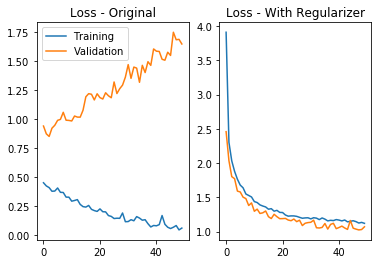

In [212]:
plt.show()

In [213]:
plt.figure(2)
plt.subplot(121)
plt.plot(range(len(acc_best)), acc_best,label='Training')
plt.plot(range(len(val_acc_best)), val_acc_best,label='Validation')
plt.title('acc - Original')
plt.legend(loc='upper left')
plt.subplot(122)
plt.plot(range(len(acc_l2)), acc_l2,label='Training')
plt.plot(range(len(val_acc_l2)), val_acc_l2,label='Validation')
plt.title('acc - With Regularizer')

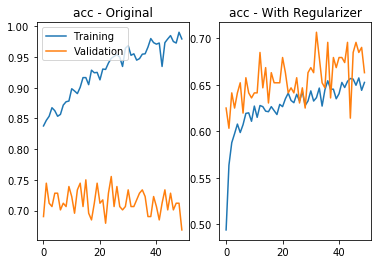

In [214]:
plt.show()

In [215]:
plt.close()
plt.clf()

## Early Stopping

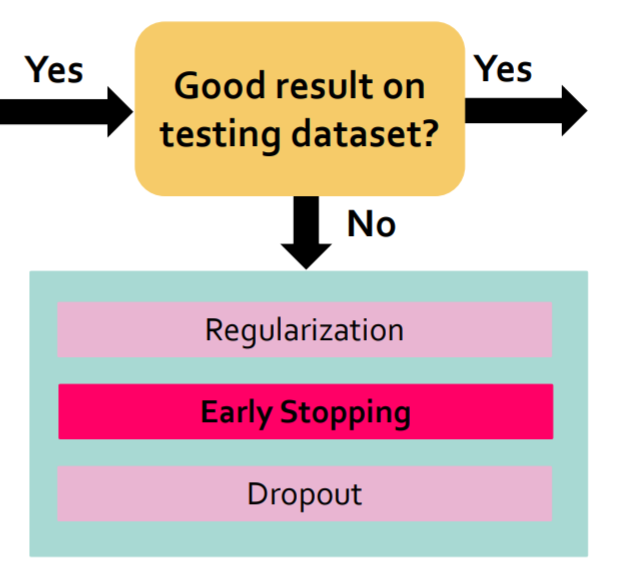

In [217]:
Image(filename='./image/early.png', width=300)

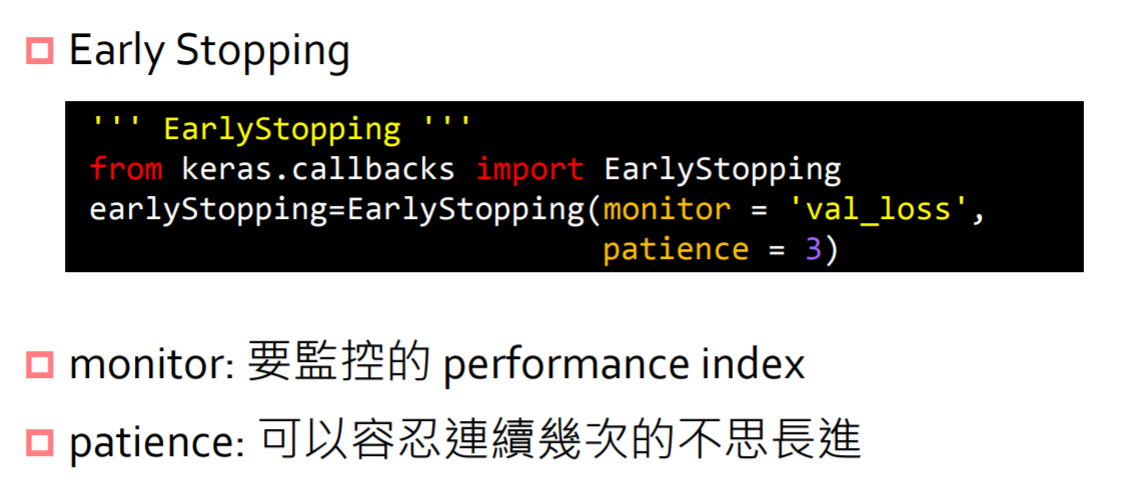

In [219]:
Image(filename='./image/early1.png', width=500)

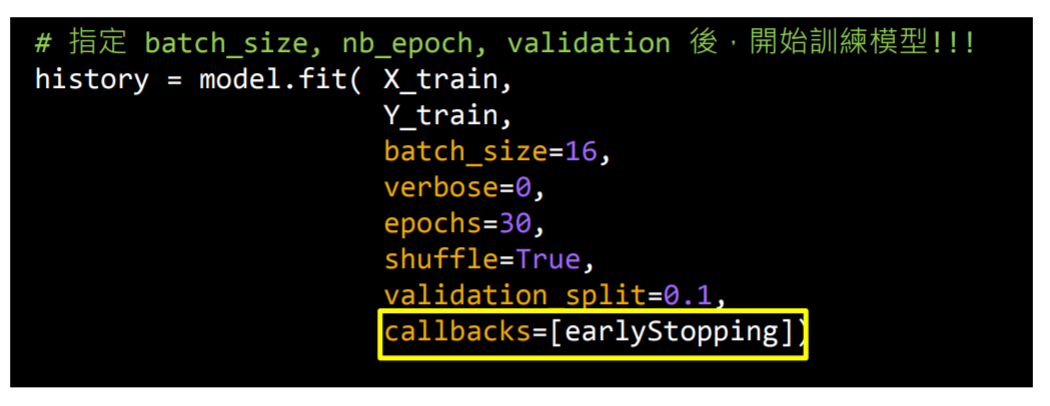

In [220]:
Image(filename='./image/early2.png', width=500)

In [236]:
model_adam = Sequential()
model_adam.add(Dense(128, input_dim=200))
model_adam.add(Activation('relu'))
model_adam.add(Dense(256))
model_adam.add(Activation('relu'))
model_adam.add(Dense(5))
model_adam.add(Activation('softmax'))

In [237]:
model_adam.compile(loss= 'categorical_crossentropy',
                   optimizer='Adam',
                   metrics=['accuracy'])

In [238]:
from keras.callbacks import EarlyStopping

earlyStopping=EarlyStopping(monitor = 'val_loss',
                            patience = 3)

In [239]:
history_adam = model_adam.fit(X_train, Y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=0,
                              shuffle=True,
                              validation_split=0.1,
                              # 加入 callbacks
                              callbacks=[earlyStopping]
                             )

In [240]:
loss_adam = history_adam.history.get('loss')
acc_adam = history_adam.history.get('acc')
val_loss_adam = history_adam.history.get('val_loss')
val_acc_adam = history_adam.history.get('val_acc')

In [241]:
plt.figure(0)
plt.subplot(121)
plt.plot(range(len(loss_adam)), loss_adam,label='Training')
plt.plot(range(len(val_loss_adam)), val_loss_adam,label='Validation')
plt.title('Loss')
plt.legend(loc='upper left')
plt.subplot(122)
plt.plot(range(len(acc_adam)), acc_adam,label='Training')
plt.plot(range(len(val_acc_adam)), val_acc_adam,label='Validation')
plt.title('Accuracy')

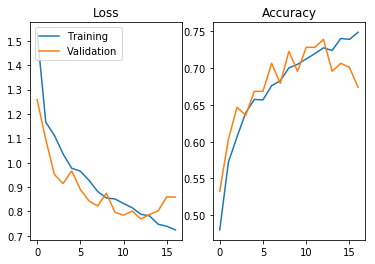

In [235]:
plt.show()

In [244]:
plt.close()
plt.clf()

## Dropout

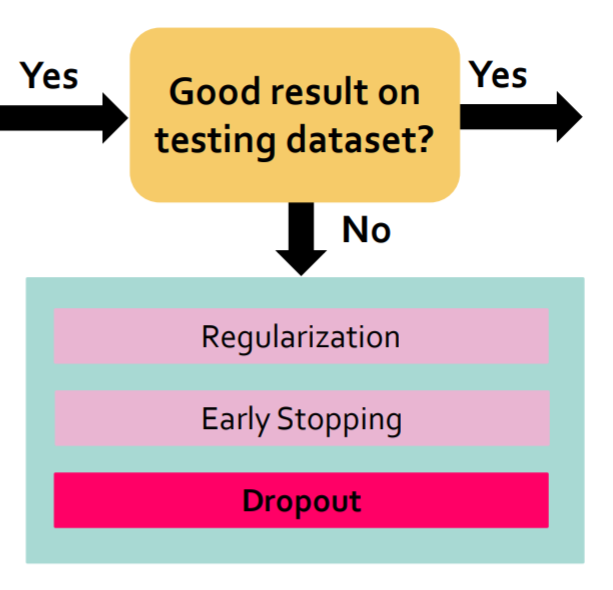

In [246]:
Image(filename='./image/drop.png', width=300)

在訓練過程中，隨機拿掉一些連結 (weight 設為0)

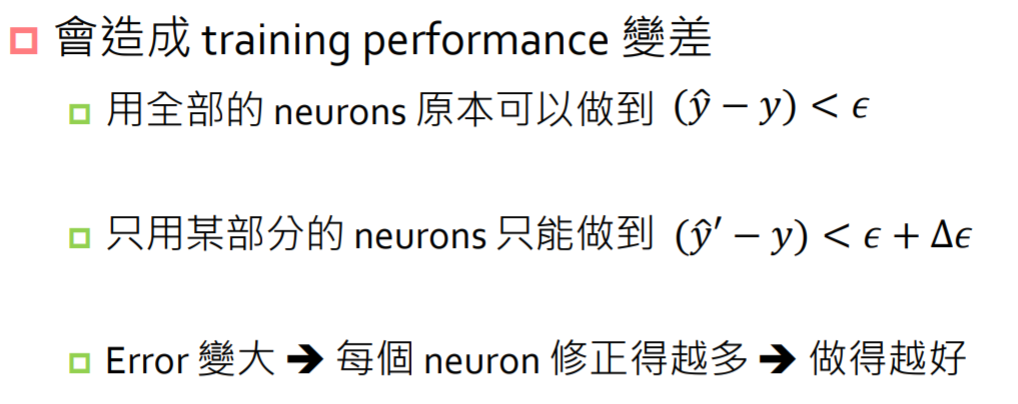

In [248]:
Image(filename='./image/drop1.png', width=400)

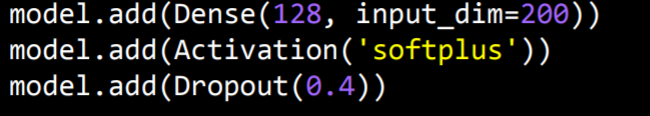

In [249]:
Image(filename='./image/drop2.png', width=400)

In [250]:
batch_size = 16
epochs = 100

In [252]:
from keras.layers.core import Dropout

model_adam = Sequential()
model_adam.add(Dense(128, input_dim=200))
model_adam.add(Activation('relu'))
model_adam.add(Dropout(0.4))

model_adam.add(Dense(256))
model_adam.add(Activation('relu'))
model_adam.add(Dropout(0.4))

model_adam.add(Dense(5))
model_adam.add(Activation('softmax'))
# DO NOT add dropout at output layer

In [253]:
model_adam.compile(loss= 'categorical_crossentropy',
                   optimizer='Adam',
                   metrics=['accuracy'])

In [254]:
history_adam = model_adam.fit(X_train, Y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=0,
                              shuffle=True,
                              validation_split=0.1)

In [255]:
loss_adam= history_adam.history.get('loss')
acc_adam = history_adam.history.get('acc')
val_loss_adam = history_adam.history.get('val_loss')
val_acc_adam = history_adam.history.get('val_acc')

In [256]:
plt.figure(0)
plt.subplot(121)
plt.plot(range(len(loss_adam)), loss_adam,label='Training')
plt.plot(range(len(val_loss_adam)), val_loss_adam,label='Validation')
plt.title('Loss')
plt.legend(loc='upper left')
plt.subplot(122)
plt.plot(range(len(acc_adam)), acc_adam,label='Training')
plt.plot(range(len(val_acc_adam)), val_acc_adam,label='Validation')
plt.title('Accuracy')

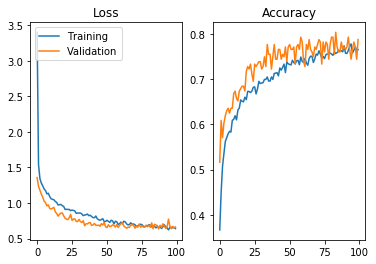

In [257]:
plt.show()

In [258]:
plt.close()
plt.clf()

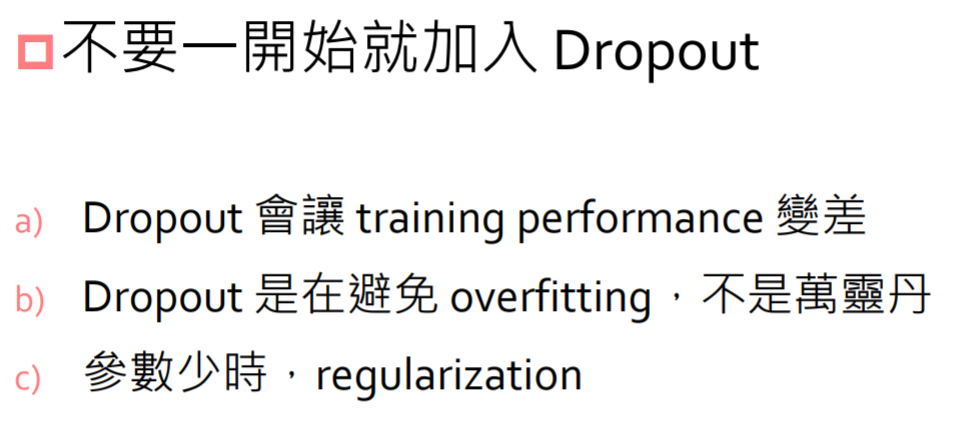

In [259]:
Image(filename='./image/drop3.png', width=400)

## Callbacks

回調函數是一組在訓練的特定階段被調用的函數集，你可以使用回調函數來觀察訓練過程中網絡內部的狀態和統計信息。

傳遞通過回調函數列表到模型的.fit()中，即可在給定的訓練階段調用該函數集中的函數。

事實上Keras的回調函數是一個類，回調函數只是習慣性稱呼

https://keras-cn.readthedocs.io/en/latest/other/callbacks/